In [101]:
import os.path

import pandas as pd
import numpy as np
import glob

from utils.constants.dir_path import DataDirPath
from utils.constants.constants import Constants
from descriptors.base_info import get_reindex_base

In [102]:
dir_path = '/Users/y1u0d2/Desktop/Lab/result/nnp-train/two-body/for_angular/nnp-train_10_10'

In [103]:
base_info = DataDirPath.base_structure_info()

In [104]:
PATH = Constants.path()
base_df = get_reindex_base()
base_df

alpha-critobalite 1 1150
alpha-quartz 1151 2250
beta-quartz 2251 3050
beta-trydymite 3051 4300
coesite 4301 5500
Fdd2-beta-critobalite 5501 6850
hex-trydymite 6851 7850
stishovite 7851 8550


,structure,structure_idx,natom,E,Vol
0,alpha-critobalite,0,48,-1011.449548,839.055430
1,alpha-critobalite,1,48,-1011.449396,839.055430
2,alpha-critobalite,2,48,-1011.449194,839.055430
3,alpha-critobalite,3,48,-1011.448339,839.055430
4,alpha-critobalite,4,48,-1011.448402,839.055430
...,...,...,...,...,...
8545,stishovite,8545,48,-1010.442985,331.977432
8546,stishovite,8546,48,-1010.386112,331.977432
8547,stishovite,8547,48,-1010.322835,331.977432
8548,stishovite,8548,48,-1010.398489,331.977432


In [105]:
# base_df['Eatom'] = base_df['E'] / base_df['natom']
# base_df[base_df.structure_idx == 34]
base_df

,structure,structure_idx,natom,E,Vol
0,alpha-critobalite,0,48,-1011.449548,839.055430
1,alpha-critobalite,1,48,-1011.449396,839.055430
2,alpha-critobalite,2,48,-1011.449194,839.055430
3,alpha-critobalite,3,48,-1011.448339,839.055430
4,alpha-critobalite,4,48,-1011.448402,839.055430
...,...,...,...,...,...
8545,stishovite,8545,48,-1010.442985,331.977432
8546,stishovite,8546,48,-1010.386112,331.977432
8547,stishovite,8547,48,-1010.322835,331.977432
8548,stishovite,8548,48,-1010.398489,331.977432


In [106]:
df_test = pd.read_csv(f'{dir_path}/analyze/testpoints.000009.out.csv')
df_train = pd.read_csv(f'{dir_path}/analyze/trainpoints.000009.out.csv')

In [107]:
df_test_new = pd.merge(df_test,base_df,left_on='index',right_on='structure_idx')
df_train_new = pd.merge(df_train,base_df,left_on='index',right_on='structure_idx')
df_concat = pd.concat([df_test_new, df_train_new])

In [108]:
norm_log_path = '/Users/y1u0d2/Desktop/Lab/result/nnp-train/two-body/for_angular/nnp-train_10_10/input.nn'
with open(norm_log_path) as f:
    l_strip = [line.strip() for line in f.readlines()]
    l_strip = list(filter(None, l_strip))
    mean_arr = [line for line in l_strip if 'mean_energy' in line]
    norm_arr = [line for line in l_strip if 'conv_energy' in line]
for mean, norm in zip(mean_arr, norm_arr):
    mean = float(mean.split(' ')[-1])
    norm = float(norm.split(' ')[-1])
print(mean, norm)

-21.061372010002167 112.2077288944109


In [109]:
df_concat['E_from_norm'] =df_concat.natom *((df_concat.Eref / norm) + float(mean))
df_concat['Ediff'] = df_concat.E - df_concat.E_from_norm

df_test_new['E_from_norm'] =df_test_new.natom *((df_test_new.Eref / norm) + float(mean))
df_test_new['Ediff'] = df_test_new.E - df_test_new.E_from_norm

In [110]:
base_df['Eatom'] = base_df.E / base_df.natom
mean = base_df['Eatom'].mean()
std = base_df['Eatom'].std()


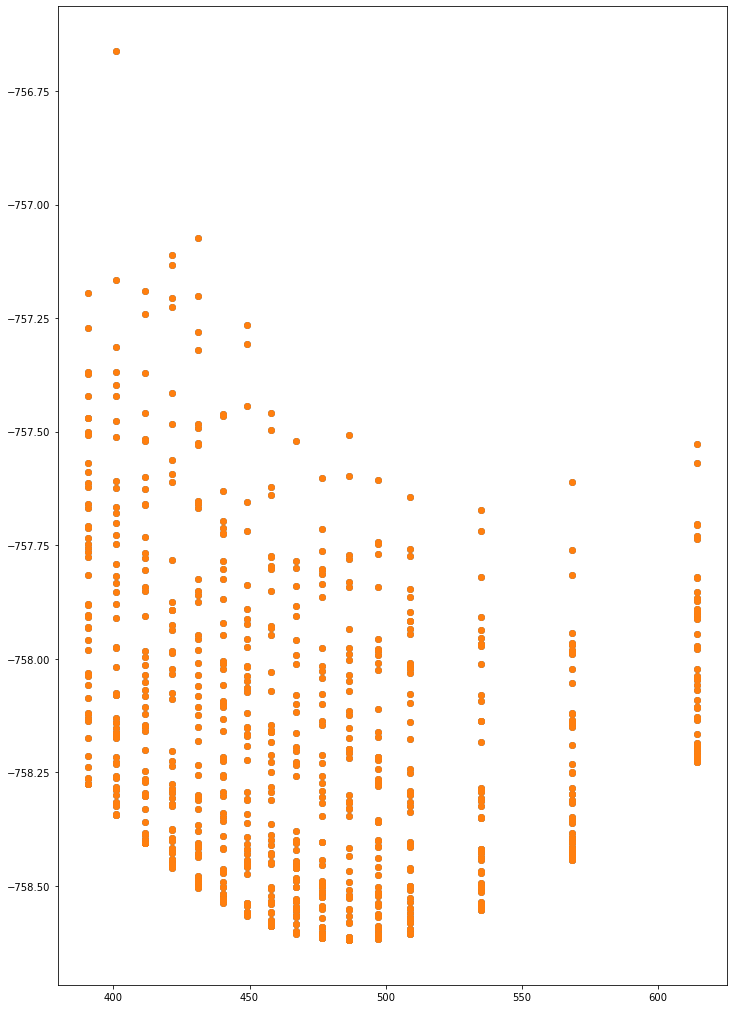

In [111]:
import matplotlib.pyplot as plt
plt.style.use({'figure.facecolor':'white'})
plt.figure(figsize=(12,18))
plt.scatter(df_concat[df_concat.structure == 'beta-quartz'].Vol, df_concat[df_concat.structure == 'beta-quartz'].E)
plt.scatter(df_concat[df_concat.structure == 'beta-quartz'].Vol, df_concat[df_concat.structure == 'beta-quartz'].E_from_norm)

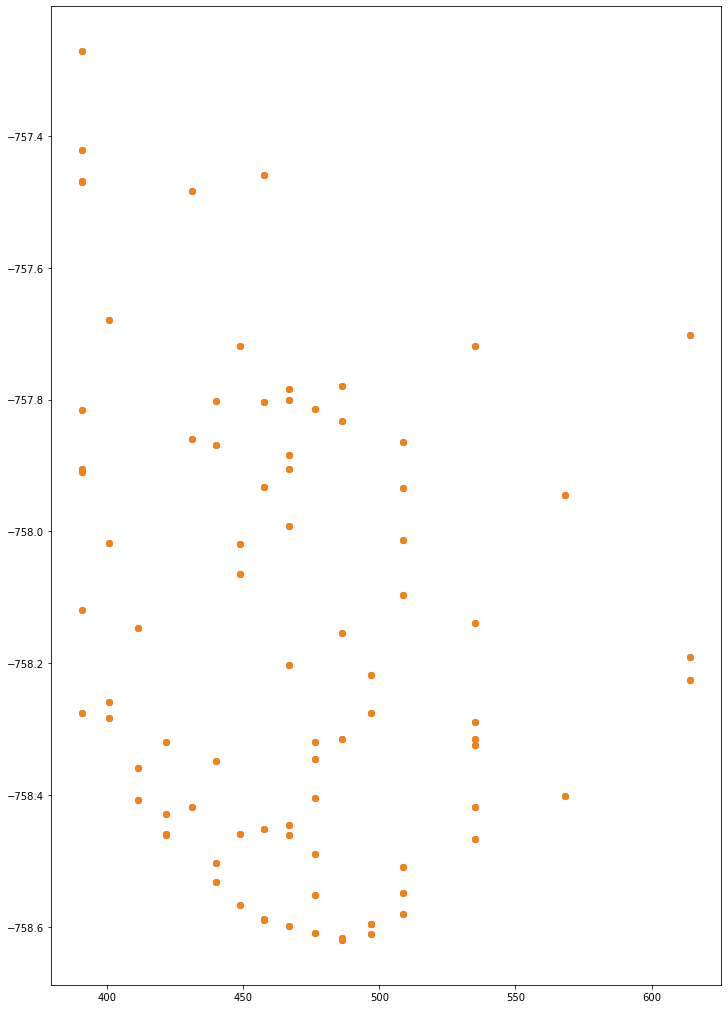

In [112]:
plt.figure(figsize=(12,18))
plt.scatter(df_test_new[df_test_new.structure == 'beta-quartz'].Vol, df_test_new[df_test_new.structure == 'beta-quartz'].E)
plt.scatter(df_test_new[df_test_new.structure == 'beta-quartz'].Vol, df_test_new[df_test_new.structure == 'beta-quartz'].E_from_norm)


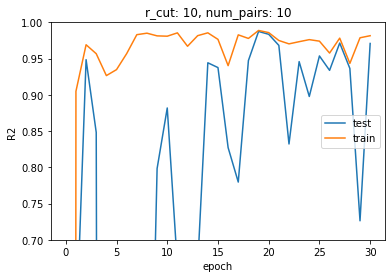

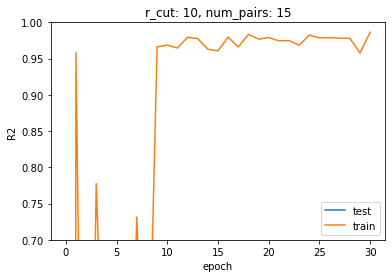

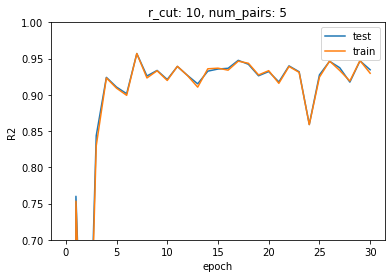

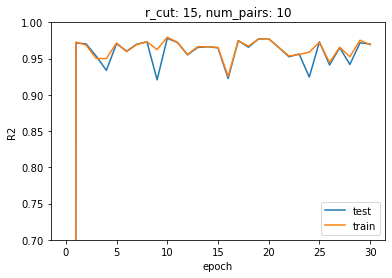

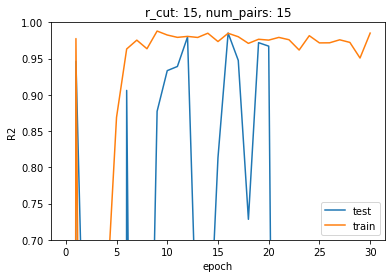

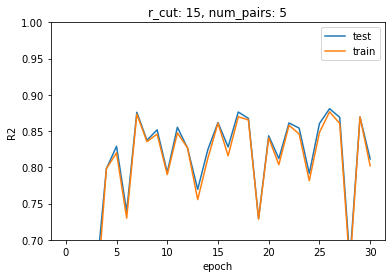

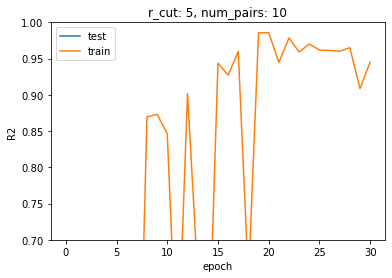

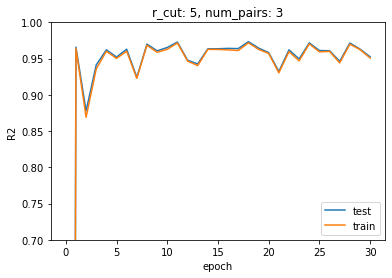

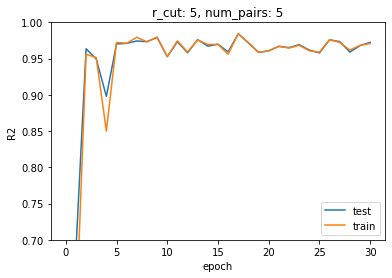

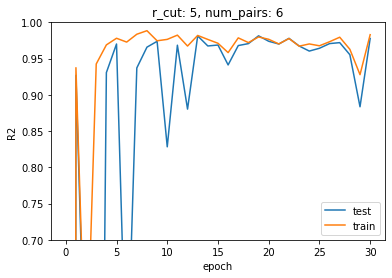

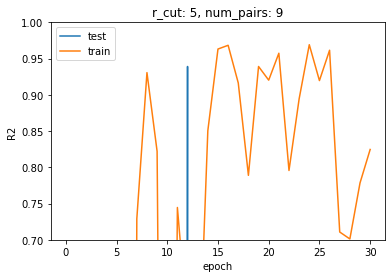

In [6]:
import os
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
dir_path = '/Users/y1u0d2/Desktop/Lab/result/nnp-train/20211124/scp'
dirs = glob.glob(f'{dir_path}/nnp*')
dirs.sort()

for directory in dirs:
    r_cut = directory.split('/')[-1].split('_')[1]
    num_pairs = directory.split('/')[-1].split('_')[-1]
    if os.path.exists(f'{directory}/analyze/score.csv'):
        df = pd.read_csv(f'{directory}/analyze/score.csv')
        df['r_cut'] = r_cut
        df['num_pairs'] = num_pairs
        df_test = df[df.type == 'test']
        df_train = df[df.type == 'train']

        fig = plt.figure(figsize=(6,4))
        plt.title(f'r_cut: {r_cut}, num_pairs: {num_pairs}')
        plt.ylim(0.7, 1)
        plt.xlabel('epoch')
        plt.ylabel('R2')
        plt.plot(df_test.epoch, df_test.R2, label="test")
        plt.plot(df_train.epoch, df_train.R2, label="train")
        plt.legend()
        fig.savefig(f'{dir_path}/pic/r_cut-{r_cut}_pairs-{num_pairs}.png')


In [114]:
from n2p2.analyze_flow import N2p2AnalyzeFlow
from descriptors.base_info import get_reindex_base
base_df = get_reindex_base()
df_train =  pd.read_csv(f'{dirs[0]}/analyze/trainpoints.000010.out.csv')
df_test =  pd.read_csv(f'{dirs[0]}/analyze/testpoints.000010.out.csv')
df_test_new = pd.merge(df_test, base_df, left_on='index', right_on='structure_idx')
df_train_new = pd.merge(df_train, base_df, left_on='index', right_on='structure_idx')

alpha-critobalite 1 1150
alpha-quartz 1151 2250
beta-quartz 2251 3050
beta-trydymite 3051 4300
coesite 4301 5500
Fdd2-beta-critobalite 5501 6850
hex-trydymite 6851 7850
stishovite 7851 8550


In [115]:
test_structure = df_test_new.structure.value_counts()
train_structure = df_train_new.structure.value_counts()

In [116]:
test_structure.sort_index(inplace=True)
train_structure.sort_index(inplace=True)
index = test_structure.index
arr = []
for test, train, structure in zip(test_structure, train_structure, index):
    print(structure, test, train, f'{round(test/train * 100,2)}%')
    arr.append([structure, test, train, f'{round(test/train * 100,2)}%'])

Fdd2-beta-critobalite 131 1219 10.75%
alpha-critobalite 98 1052 9.32%
alpha-quartz 114 986 11.56%
beta-quartz 85 715 11.89%
beta-trydymite 118 1132 10.42%
coesite 107 1093 9.79%
hex-trydymite 117 883 13.25%
stishovite 59 641 9.2%


In [117]:
df = pd.DataFrame(arr, columns=['structure', 'num_test', 'num_train', 'ratio'])


In [118]:
df

,structure,num_test,num_train,ratio
0,Fdd2-beta-critobalite,131,1219,10.75%
1,alpha-critobalite,98,1052,9.32%
2,alpha-quartz,114,986,11.56%
3,beta-quartz,85,715,11.89%
4,beta-trydymite,118,1132,10.42%
5,coesite,107,1093,9.79%
6,hex-trydymite,117,883,13.25%
7,stishovite,59,641,9.2%


In [119]:
sum = df.num_test.sum()
sum_train = df.num_train.sum()
print(sum / (sum_train + sum))

0.09695906432748538


In [120]:
df_test_new['Eatom'] = df_test_new.E / df_test_new.natom
df_train_new['Eatom'] = df_train_new.E / df_train_new.natom

df_test_new['Volatom'] = df_test_new.Vol / df_test_new.natom
df_train_new['Volatom'] = df_train_new.Vol / df_train_new.natom

In [121]:
df_test_new


,index,Eref,Ennp,structure,structure_idx,natom,E,Vol,Eatom,Volatom
0,33,0.164652,0.055695,alpha-critobalite,33,48,-1010.875422,839.055430,-21.059905,17.480321
1,358,-1.005827,-0.931778,alpha-critobalite,358,48,-1011.376127,522.736660,-21.070336,10.890347
2,386,0.027873,0.092400,alpha-critobalite,386,48,-1010.933933,522.736660,-21.061124,10.890347
3,531,0.096495,0.117670,alpha-critobalite,531,48,-1010.904578,908.013213,-21.060512,18.916942
4,1045,0.545922,0.464974,alpha-critobalite,1045,48,-1010.712323,814.934288,-21.056507,16.977798
...,...,...,...,...,...,...,...,...,...,...
824,7936,0.157981,0.081920,stishovite,7936,48,-1010.878276,350.302260,-21.059964,7.297964
825,8258,-1.178945,-1.127401,stishovite,8258,48,-1011.450183,345.233252,-21.071879,7.192359
826,8414,-0.991375,-0.956022,stishovite,8414,48,-1011.369945,408.644169,-21.070207,8.513420
827,8454,-1.199050,-1.150203,stishovite,8454,48,-1011.458784,395.003095,-21.072058,8.229231


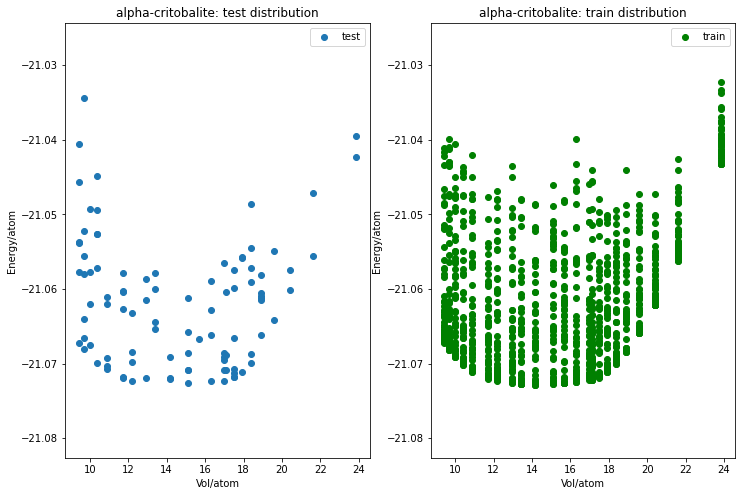

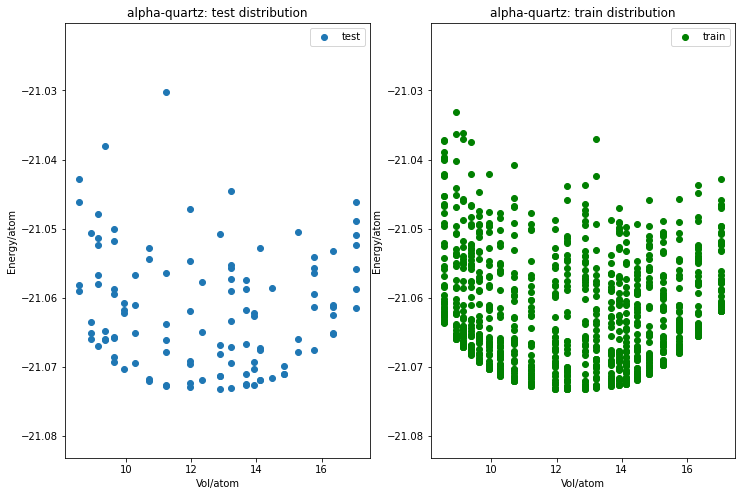

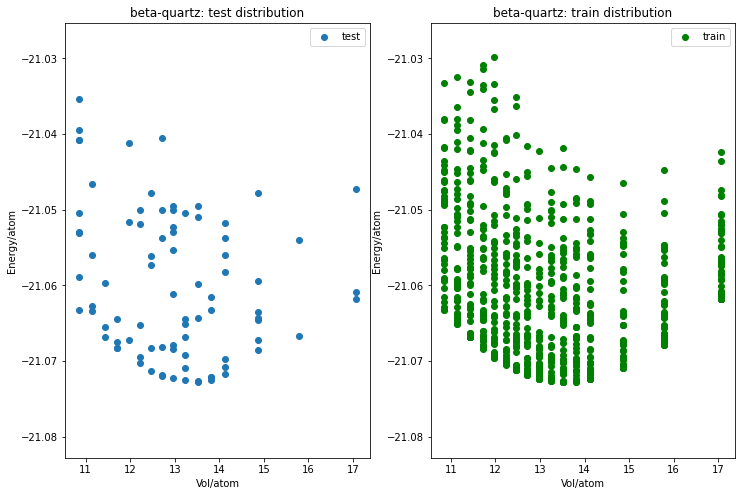

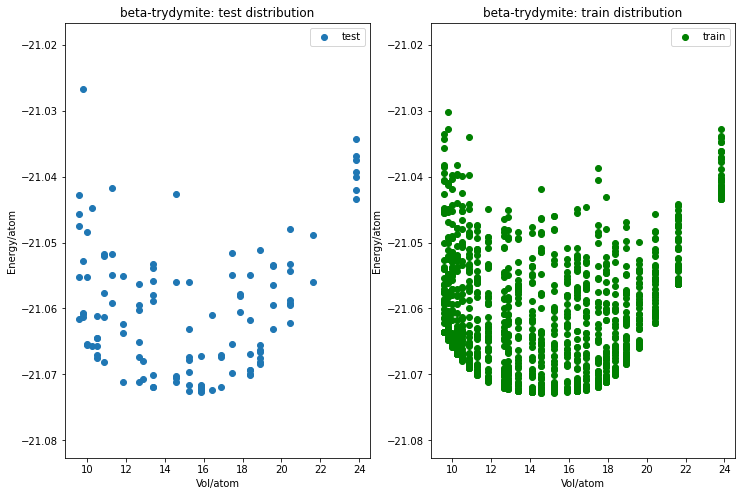

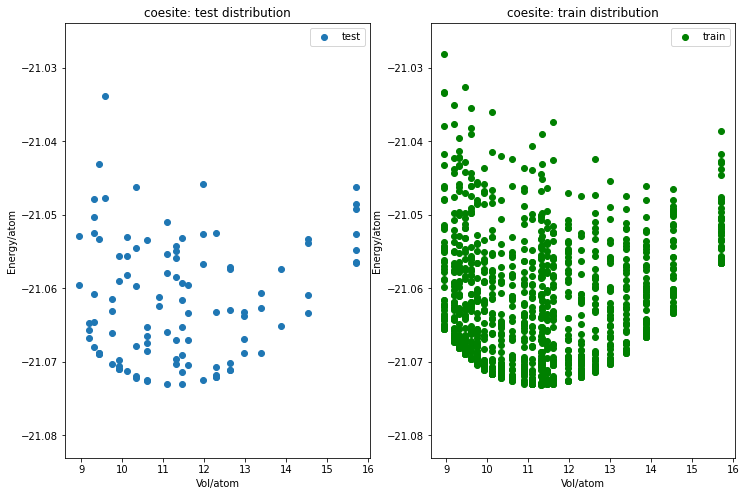

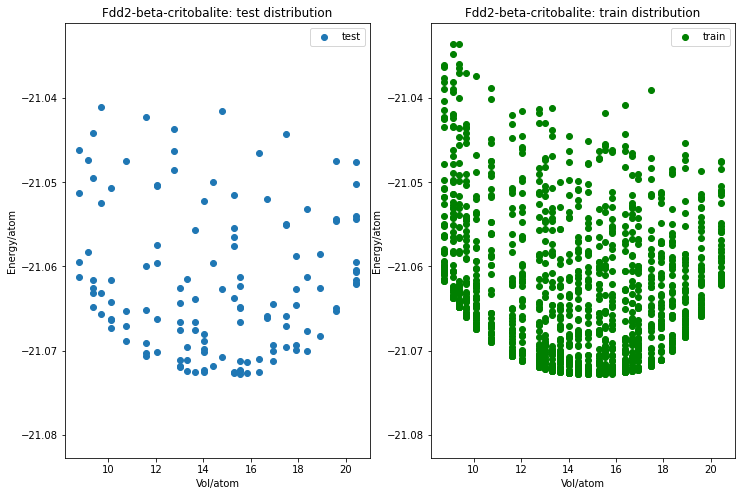

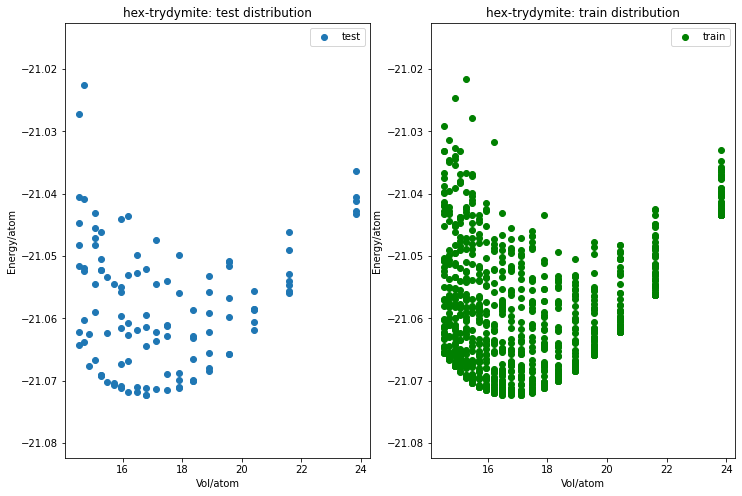

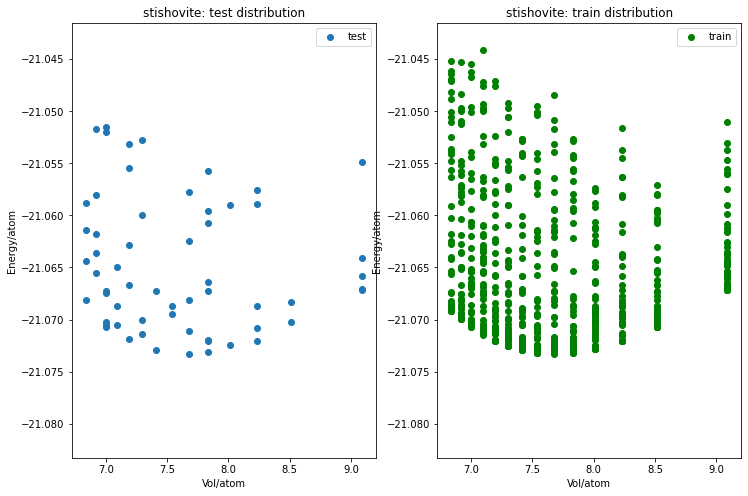

In [122]:
structres = df_test_new.structure.unique()
for structure in structres:
    fig, axes = plt.subplots(1,2, figsize=(12,8))
    df_test = df_test_new[df_test_new['structure'] == structure]
    ymax = df_test.Eatom.max() + 0.01
    ymin = df_test.Eatom.min() - 0.01
    axes[0].set_ylim(ymin, ymax)
    axes[0].set_title(f'{structure}: test distribution')
    axes[0].set_xlabel('Vol/atom')
    axes[0].set_ylabel('Energy/atom')
    axes[0].scatter(df_test.Volatom, df_test.Eatom, label='test')
    axes[0].legend()

    df_train = df_train_new[df_train_new['structure'] == structure]
    # ymax = df_train.Eatom.max() + 0.01
    # ymin = df_train.Eatom.min() - 0.01
    axes[1].set_xlabel('Vol/atom')
    axes[1].set_ylabel('Energy/atom')
    axes[1].set_ylim(ymin, ymax)
    axes[1].set_title(f'{structure}: train distribution')
    axes[1].scatter(df_train.Volatom, df_train.Eatom, label='train', color='green')
    axes[1].legend()
    fig.savefig(f'{dir_path}/pic/test_train_distribution/{structure}.png')

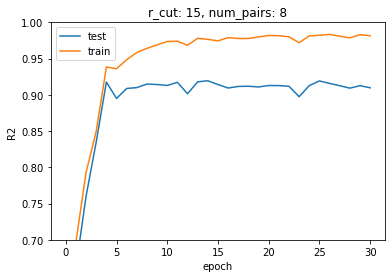

In [5]:
import os
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
plt.style.use({'figure.facecolor':'white'})
dir_path = '/Users/y1u0d2/Desktop/Lab/result/nnp-train/rdf-inform/20211117/angular/01'
dirs = glob.glob(f'{dir_path}')
dirs.sort()

for directory in dirs:
    r_cut = 15
    num_pairs = 8
    if os.path.exists(f'{directory}/analyze/score.csv'):
        df = pd.read_csv(f'{directory}/analyze/score.csv')
        df['r_cut'] = r_cut
        df['num_pairs'] = num_pairs
        df_test = df[df.type == 'test']
        df_train = df[df.type == 'train']

        fig = plt.figure(figsize=(6,4))
        plt.title(f'r_cut: {r_cut}, num_pairs: {num_pairs}')
        plt.ylim(0.7, 1)
        plt.xlabel('epoch')
        plt.ylabel('R2')
        plt.plot(df_test.epoch, df_test.R2, label="test")
        plt.plot(df_train.epoch, df_train.R2, label="train")
        plt.legend()
        plt.show()
        # fig.savefig(f'{dir_path}/pic/r_cut-{r_cut}_pairs-{num_pairs}.png')

In [11]:
# Bohr -> ang
CONVERT_ANG = 0.529177;
# Hartree -> eV
CONVERT_EV = 27.2114;
# Hartree/Bohr -> eV/ang
CONVERT_FORCE = CONVERT_EV / CONVERT_ANG;
lattice = '123 222 444'
lattice = ' '.join([str(float(i) * CONVERT_ANG) for i in lattice.split(' ')])
print(lattice)

65.088771 117.477294 234.954588


In [3]:
from n2p2.auto_sf.sfparamgen import SymFuncParamGenerator
myGenerator = SymFuncParamGenerator(elements=['Si', 'O'], r_cutoff = 15)
myGenerator.symfunc_type = 'angular_narrow'
myGenerator.zetas = [1.0, 15.0]
# myGenerator.generate_radial_params(rule='imbalzano2018', mode='shift', nb_param_pairs=5)
myGenerator.generate_radial_params(rule='gastegger2018', mode='center', nb_param_pairs=2, r_lower=1.5)
myGenerator.write_settings_overview()
myGenerator.write_parameter_strings()


#########################################################################
# Narrow angular symmetry function set, for elements ['Si', 'O']
#########################################################################
# r_cutoff       = 15
# The following settings were used for generating sets
# of values for the radial parameters r_shift and eta:
# rule           = gastegger2018
# mode           = center
# nb_param_pairs = 2
# r_lower        = 1.5
# r_upper        = 15
# Sets of values for parameters:
# r_shift_grid   = [0. 0.]
# eta_grid       = [0.2222 0.0022]
# lambdas        = [-1.  1.]
# zetas          = [ 1. 15.]

symfunction_short Si 3 Si Si 2.222E-01 -1 1.000E+00 1.500E+01 0.000E+00
symfunction_short Si 3 Si Si 2.222E-01  1 1.000E+00 1.500E+01 0.000E+00
symfunction_short Si 3 Si Si 2.222E-01 -1 1.500E+01 1.500E+01 0.000E+00
symfunction_short Si 3 Si Si 2.222E-01  1 1.500E+01 1.500E+01 0.000E+00
symfunction_short Si 3 Si Si 2.222E-03 -1 1.000E+00 1.500E+01 0.000E+00
symfunction_shor